In [106]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [107]:
df = pd.read_csv('data/Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [108]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [110]:
df[df.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [111]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire        0.0  
1  not fire        0.0  
2  not fire        0.0  
3  not fire        0.0  
4  not fire        0.0

In [112]:
df[['Region']] = df[['Region']].astype(int) 

In [113]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire          0  
1  not fire          0  
2  not fire          0  
3  not fire          0  
4  not fire          0

In [114]:
df[df['FWI'].isnull() == True]

day month year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

    FFMC  DMC   DC  ISI  BUI  FWI Classes    Region  
122  NaN  NaN  NaN  NaN  NaN  NaN       NaN       1

In [115]:
df = df.dropna().reset_index(drop=True)

In [116]:
df = df.drop(122).reset_index(drop=True)

In [119]:
df.loc[122]

day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   1
Name: 122, dtype: object

In [120]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:
df.columns ## classes da boşluk var

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [122]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [124]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [127]:
objects = [features for features in df.columns if df[features].dtypes == 'O']

In [128]:
for i in objects:
    if i != 'Classes':
        df[i]=df[i].astype('float')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [136]:
df.to_csv('data/Algerian_forest_fires_cleaned.csv',index=False)

In [137]:
df_copy = df.drop(['day','month','year'],axis=1)

In [138]:
df_copy.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI      Classes  \
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire      
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire      
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire      
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire      
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire      

   Region  
0       0  
1       0  
2       0  
3       0  
4       0

In [140]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [141]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)
df_copy.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0

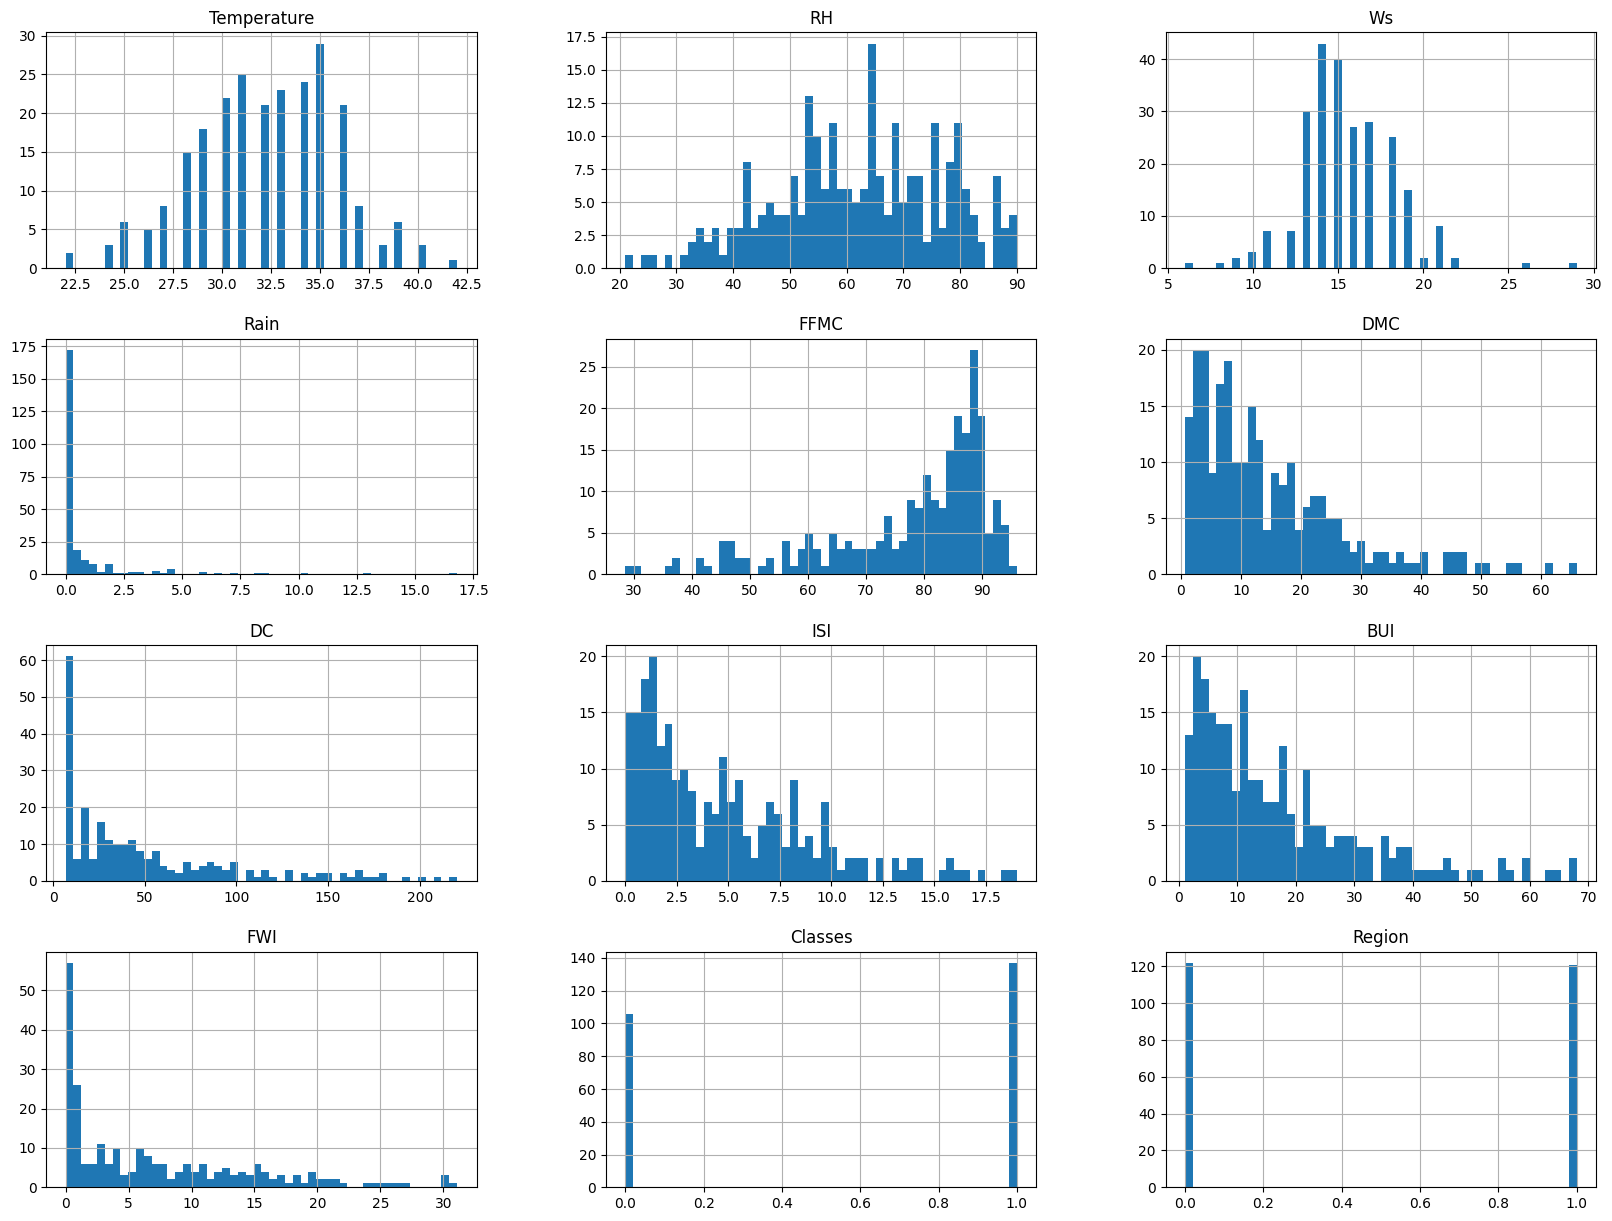

In [ ]:
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [145]:
## Percentage for Pie Chart
percentage = df_copy['Classes'].value_counts(normalize=True) * 100

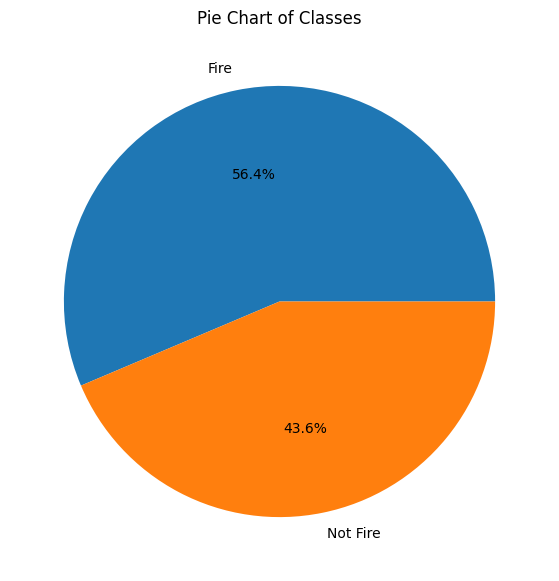

In [146]:
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie Chart of Classes')
plt.show()

In [153]:
## Correlation
corr = df_copy.corr()

In [157]:
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
mask

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
        False,  True

In [ ]:

# Üst üçgeni stack'leyip tablo haline getir
high_corr = (
    corr.where(mask)  # sadece üst üçgen
    .stack()          # tabloyu uzun formata çevir
    .reset_index()
    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0: 'Correlation'})
)

# 0.5'ten büyük korelasyonları filtrele
high_corr = high_corr[high_corr['Correlation'] > 0.5]
print(high_corr)

      Feature_1 Feature_2  Correlation
3   Temperature      FFMC     0.676568
6   Temperature       ISI     0.603871
8   Temperature       FWI     0.566670
9   Temperature   Classes     0.516015
38         FFMC       DMC     0.603608
39         FFMC        DC     0.507397
40         FFMC       ISI     0.740007
41         FFMC       BUI     0.592011
42         FFMC       FWI     0.691132
43         FFMC   Classes     0.769492
45          DMC        DC     0.875925
46          DMC       ISI     0.680454
47          DMC       BUI     0.982248
48          DMC       FWI     0.875864
49          DMC   Classes     0.585658
51           DC       ISI     0.508643
52           DC       BUI     0.941988
53           DC       FWI     0.739521
54           DC   Classes     0.511123
56          ISI       BUI     0.644093
57          ISI       FWI     0.922895
58          ISI   Classes     0.735197
60          BUI       FWI     0.857973
61          BUI   Classes     0.586639
63          FWI   Classes

<Axes: >

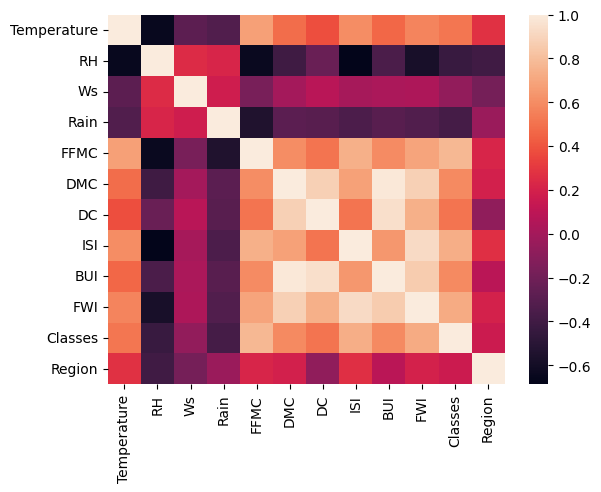

In [159]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

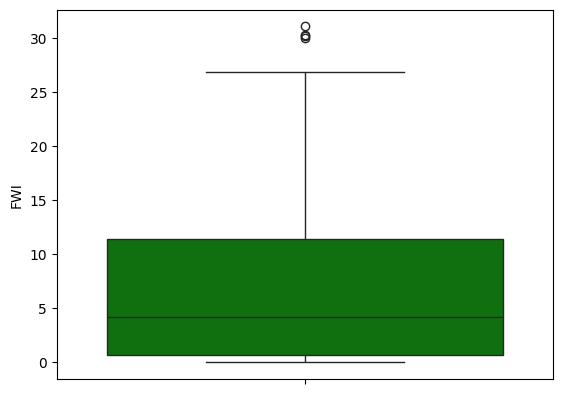

In [163]:
sns.boxplot(df_copy['FWI'], color='green')

In [164]:
df

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Region  
0    0.5   not fire          0  
1    0.4   not fire          0  
2    0.1   not fire          0  
3    0.0   not fire          0  
4    0.5   not fire          0  
..   ...           ...     ...  
238  6.5       fire          1  
239  0.0   not fire          1  
240  0.2   not fire          1  
241  0.7   not fire          1  
242  0.5  not fire           1  

[243 rows x 15 columns]

In [165]:
## Monthly for analysis
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  Region  
0  0.5  not fire       0  
1  0.4  not fire       0  
2  0.1  not fire       0  
3  0.0  not fire       0  
4  0.5  not fire       0

<Axes: xlabel='month', ylabel='count'>

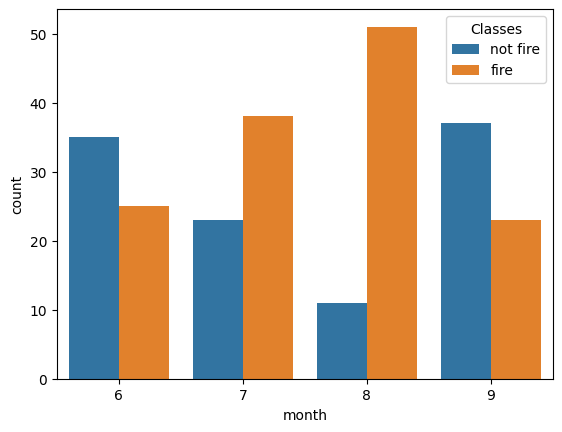

In [167]:

sns.countplot(x='month',hue='Classes',data=df)